In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("flood_model_labeled.csv")


In [5]:
features = [
    "tmin", "tmax", 
    "soil_temp_5cm", "soil_temp_10cm", "soil_temp_20cm", "soil_temp_50cm",
    "soil_moisture_0_5cm", "rainfall"
]
X = df[features]
y = df["flood"]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1388
           1       0.00      0.00      0.00        73

    accuracy                           0.95      1461
   macro avg       0.48      0.50      0.49      1461
weighted avg       0.90      0.95      0.93      1461



/Users/fmhadiurrahman/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fmhadiurrahman/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fmhadiurrahman/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

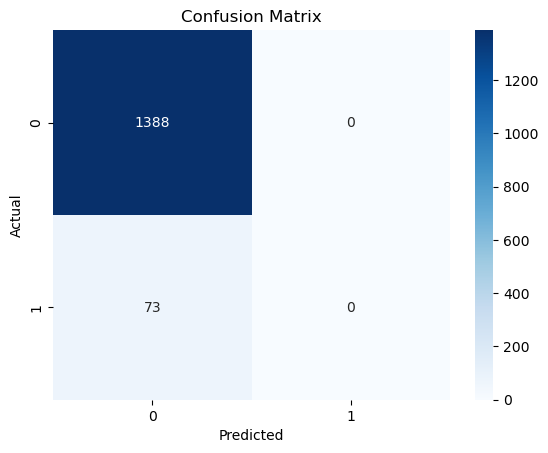

In [13]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Logistic Regression (Balanced) Report:\n", classification_report(y_test, y_pred))


Logistic Regression (Balanced) Report:
               precision    recall  f1-score   support

           0       0.99      0.65      0.79      1388
           1       0.12      0.89      0.21        73

    accuracy                           0.66      1461
   macro avg       0.55      0.77      0.50      1461
weighted avg       0.95      0.66      0.76      1461



In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1388
           1       0.57      0.05      0.10        73

    accuracy                           0.95      1461
   macro avg       0.76      0.53      0.54      1461
weighted avg       0.93      0.95      0.93      1461



In [19]:
import pandas as pd
df = pd.read_csv("flood_model_labeled.csv", parse_dates=["date"])


known_floods = [
    "2002-03-01",
    "2003-01-05",
    "2004-01-15",
    "2008-01-20",
    "2011-01-15",
    "2013-06-04",
    "2014-02-10",
    "2018-01-04",
    "2021-02-05",
    "2021-07-15"
]
known_floods = pd.to_datetime(known_floods)


df["known_flood"] = df["date"].isin(known_floods).astype(int)
print(df[df["known_flood"] == 1][["date", "discharge", "flood"]])


           date  discharge  flood
59   2002-03-01     7000.0      1
369  2003-01-05     8840.0      1
744  2004-01-15     5320.0      1
2210 2008-01-20     2670.0      0
3301 2011-01-15     7380.0      1
4172 2013-06-04     6070.0      1
4423 2014-02-10     2060.0      0
5847 2018-01-04     5350.0      1
6975 2021-02-05     7320.0      1
7135 2021-07-15     5330.0      1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("flood_model_labeled.csv", parse_dates=["date"])


known_floods = pd.to_datetime([
    "2002-03-01", "2003-01-05", "2004-01-15", "2008-01-20",
    "2011-01-15", "2013-06-04", "2014-02-10", "2018-01-04",
    "2021-02-05", "2021-07-15"
])

df["flood"] = ((df["discharge"] > 4028) | df["date"].isin(known_floods)).astype(int)


df.to_csv("flood_model_labeled_updated.csv", index=False)
print("Updated flood labels saved to flood_model_labeled_updated.csv")


✅ Updated flood labels saved to flood_model_labeled_updated.csv


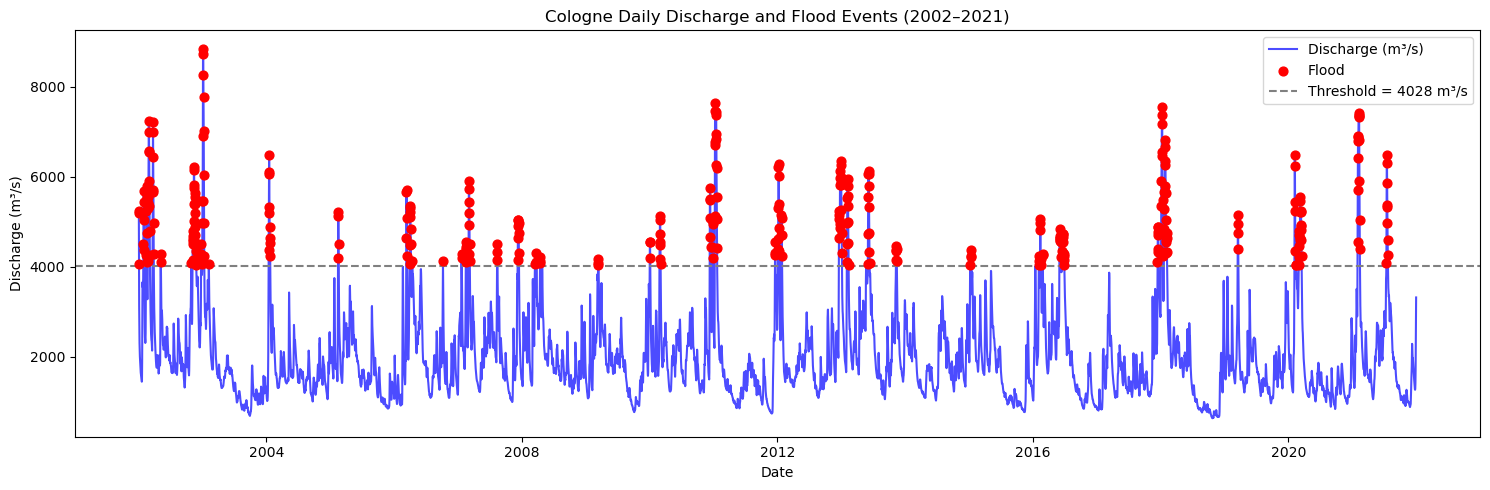

In [21]:

plt.figure(figsize=(15, 5))
plt.plot(df["date"], df["discharge"], label="Discharge (m³/s)", color="blue", alpha=0.7)
plt.scatter(df[df["flood"] == 1]["date"], df[df["flood"] == 1]["discharge"],
            color="red", label="Flood", s=40, zorder=3)
plt.axhline(4028, color="gray", linestyle="--", label="Threshold = 4028 m³/s")
plt.title("Cologne Daily Discharge and Flood Events (2002–2021)")
plt.xlabel("Date")
plt.ylabel("Discharge (m³/s)")
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
lags = [1, 2, 3]
for lag in lags:
    df[f"rainfall_lag{lag}"] = df["rainfall"].shift(lag)
    df[f"soil_moisture_lag{lag}"] = df["soil_moisture_0_5cm"].shift(lag)

df["rainfall_rolling3"] = df["rainfall"].rolling(window=3).mean()
df["soil_moisture_rolling3"] = df["soil_moisture_0_5cm"].rolling(window=3).mean()

df.dropna(inplace=True)  # Drop first few rows with NaNs
df.to_csv("flood_model_lagged.csv", index=False)
print("Saved: flood_model_lagged.csv with lag features")


Saved: flood_model_lagged.csv with lag features


In [25]:
# Safe drop for known_flood if it exists
cols_to_drop = ["date", "flood"]
if "known_flood" in df.columns:
    cols_to_drop.append("known_flood")

X = df.drop(columns=cols_to_drop)
y = df["flood"]



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#logistik regression------

lr = LogisticRegression(class_weight="balanced", max_iter=1000)
lr.fit(X_train, y_train)
print("Logistic Regression (Balanced)")
print(classification_report(y_test, lr.predict(X_test)))

# -------Random Forest-----------
rf = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)
print("Random Forest")
print(classification_report(y_test, rf.predict(X_test)))


/Users/fmhadiurrahman/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (Balanced)
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1380
           1       0.85      0.99      0.91        81

    accuracy                           0.99      1461
   macro avg       0.93      0.99      0.95      1461
weighted avg       0.99      0.99      0.99      1461

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1380
           1       1.00      1.00      1.00        81

    accuracy                           1.00      1461
   macro avg       1.00      1.00      1.00      1461
weighted avg       1.00      1.00      1.00      1461



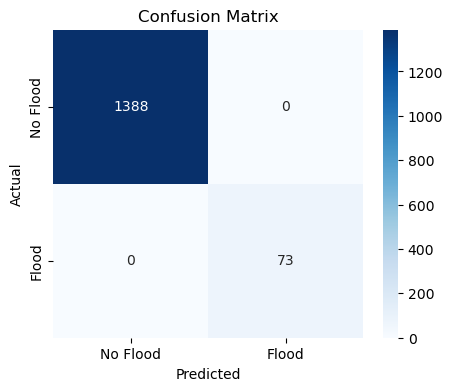

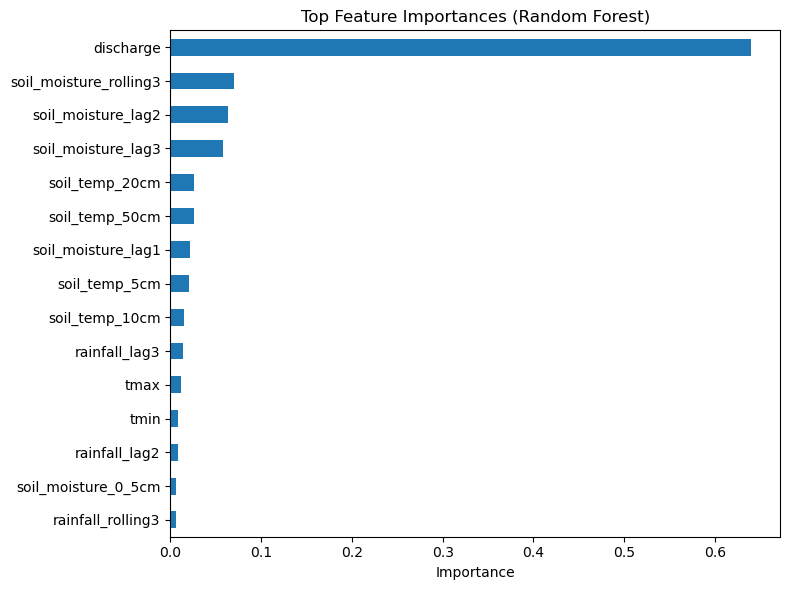

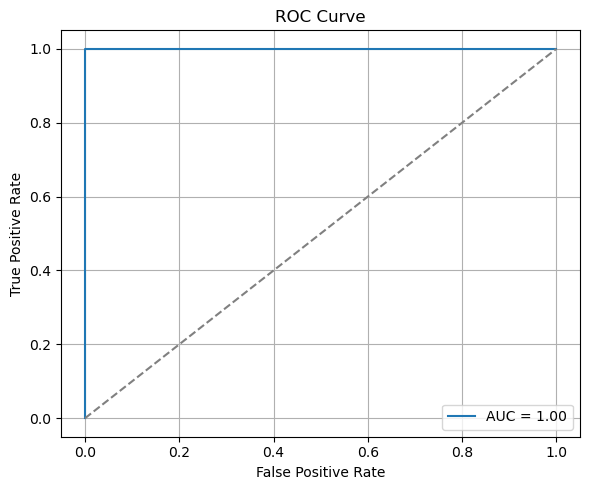

Cross-Validation F1 Scores: [1.         0.99310345 1.         0.98611111 1.        ]
Mean F1 Score: 0.9958429118773946
✅ Model saved as: random_forest_flood_model.pkl


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Loading lagged data------------
df = pd.read_csv("flood_model_lagged.csv", parse_dates=["date"])


X = df.drop(columns=["date", "flood"])
y = df["flood"]

# Splitting train test data-----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]


plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Flood", "Flood"], yticklabels=["No Flood", "Flood"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
importances.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


scores = cross_val_score(rf, X, y, cv=5, scoring="f1")
print("Cross-Validation F1 Scores:", scores)
print("Mean F1 Score:", scores.mean())


joblib.dump(rf, "random_forest_flood_model.pkl")
print("✅ Model saved as: random_forest_flood_model.pkl")


In [29]:
from joblib import dump
dump(lr, "logistic_regression_flood_model.pkl")
print("Logistic Regression model saved.")
